In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Salary_Data_Cleaned.csv')
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Max Salary,Avg Salary,Company Txt,Job State,Same State,Company Age,Python,SQL,Tableu,Excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,91,72.0,Tecolote Research\n,NM,0,48,1,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,112,87.5,University of Maryland Medical System\n,MD,0,37,1,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,90,85.0,KnowBe4\n,FL,1,11,1,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,97,76.5,PNNL\n,WA,1,56,1,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,143,114.5,Affinity Solutions\n,NY,1,23,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,111,84.5,GSK\n,MA,0,191,0,0,0,0
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,133,102.5,Eventbrite\n,TN,0,15,1,1,0,0
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,91,73.5,Software Engineering Institute\n,PA,1,37,0,0,0,1
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,160,127.5,"Numeric, LLC\n",PA,0,-1,0,0,0,1


### More modifying data frame... Again...

In [3]:
## Job title and seniority 


def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na' 

In [4]:
df['Job Simplifier'] = df['Job Title'].apply(title_simplifier)

In [5]:
df['Job Simplifier'].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: Job Simplifier, dtype: int64

In [6]:
df['Seniority'] = df['Job Title'].apply(seniority)
df.Seniority.value_counts()

na        520
senior    220
jr          2
Name: Seniority, dtype: int64

In [7]:
# Fixing state Los Angeles

df['Job State'].value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 UT              10
 IN              10
 WI              10
 MO               9
 AZ               9
 AL               8
 GA               6
 DE               6
 KY               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 MN               2
 ID               2
 Los Angeles      1
 SC               1
 RI               1
Name: Job State, dtype: int64

In [8]:
df['Job State'] = df['Job State'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df['Job State'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
IN     10
WI     10
UT     10
AZ      9
MO      9
AL      8
DE      6
KY      6
GA      6
MI      6
CT      5
IA      5
LA      4
NE      4
OR      4
KS      3
NM      3
ID      2
MN      2
RI      1
SC      1
Name: Job State, dtype: int64

In [9]:
# Job description length 

df['Desc Length'] = df['Job Description'].apply(lambda x: len(x))
df['Desc Length']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: Desc Length, Length: 742, dtype: int64

In [10]:
# Competitor count

df['Num of Competitors'] = df['Competitors'].apply(lambda x : len(x.split(',')) if x != '-1' else 0)
df['Num of Competitors']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: Num of Competitors, Length: 742, dtype: int64

In [11]:
# Hourly wage to annual 
# We multiply the Min and Max Salary by 2,000 (8hrs/day * 5 days/week * 50 weeks), 
# But because the salary format is divided by 1,000 (70 means 70,000 dollars), 
# then we only have to multiply it by 2 (2,000 / 1,000)

df['Min Salary'] = df.apply(lambda x : x['Min Salary'] * 2 if x.Hourly == 1 else x['Min Salary'], axis = 1)
df['Max Salary'] = df.apply(lambda x : x['Max Salary'] * 2 if x.Hourly == 1 else x['Max Salary'], axis = 1)
df['Avg Salary'] = df.apply(lambda x : (x['Min Salary'] + x['Max Salary']) / 2 if x.Hourly == 1 else x['Avg Salary'], axis = 1)
df[df['Hourly'] == 1][['Hourly', 'Min Salary', 'Max Salary', 'Avg Salary']]

,Hourly,Min Salary,Max Salary,Avg Salary
165,1,34,48,41.0
177,1,42,68,55.0
197,1,36,50,43.0
202,1,42,68,55.0
210,1,30,50,40.0
246,1,34,48,41.0
271,1,42,68,55.0
337,1,36,50,43.0
345,1,48,78,63.0
357,1,42,68,55.0


In [12]:
# Remove new line from job title

df['Company Txt'] = df['Company Txt'].apply(lambda x : x.replace('\n',''))
df['Company Txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: Company Txt, Length: 742, dtype: object

In [13]:
df.describe()

,Rating,Founded,Hourly,Employer Provided,Min Salary,Max Salary,Avg Salary,Same State,Company Age,Python,SQL,Tableu,Excel,Desc Length,Num of Competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,101.434636,0.557951,47.524259,0.528302,0.512129,0.0,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,37.546122,0.496965,53.839080,0.499535,0.500190,0.0,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,0.000000,-1.000000,0.000000,0.000000,0.0,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,12.000000,0.000000,0.000000,0.0,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,25.000000,1.000000,1.000000,0.0,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,1.000000,1.000000,0.0,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.000000,0.0,1.000000,10051.000000,4.000000


### Plotting Histogram 

<AxesSubplot:>

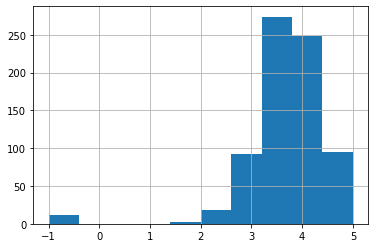

In [14]:
df.Rating.hist()

<AxesSubplot:>

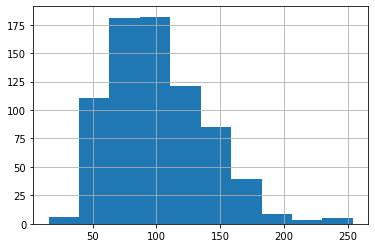

In [15]:
df['Avg Salary'].hist()

<AxesSubplot:>

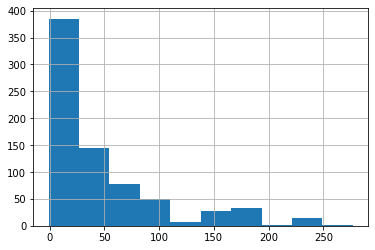

In [16]:
df['Company Age'].hist()

<AxesSubplot:>

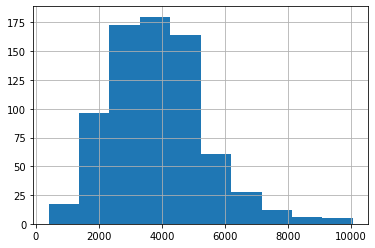

In [17]:
df['Desc Length'].hist()

### Plotting Boxplot

<AxesSubplot:>

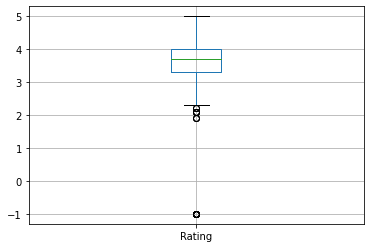

In [18]:
df.boxplot(column = 'Rating')

<AxesSubplot:>

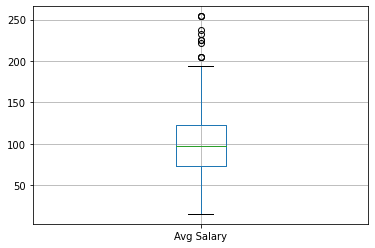

In [19]:
df.boxplot(column = 'Avg Salary')

<AxesSubplot:>

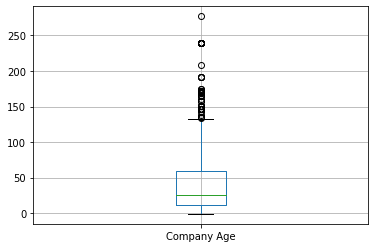

In [20]:
df.boxplot(column = 'Company Age')

<AxesSubplot:>

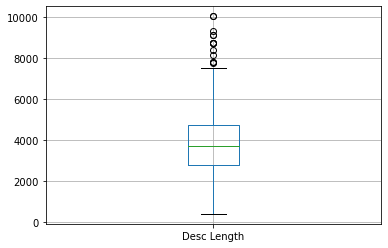

In [21]:
df.boxplot(column = 'Desc Length')

##### From all the plots above, Company Age has the most dense outlier

### Avoid Multicollinearity

In [22]:
# Correlation

df[['Company Age','Avg Salary','Rating','Desc Length','Num of Competitors']].corr()


,Company Age,Avg Salary,Rating,Desc Length,Num of Competitors
Company Age,1.000000,0.021936,0.023162,0.164188,0.127482
Avg Salary,0.021936,1.000000,0.012517,0.070474,0.083263
Rating,0.023162,0.012517,1.000000,-0.012281,0.027190
Desc Length,0.164188,0.070474,-0.012281,1.000000,0.104620
Num of Competitors,0.127482,0.083263,0.027190,0.104620,1.000000


<AxesSubplot:>

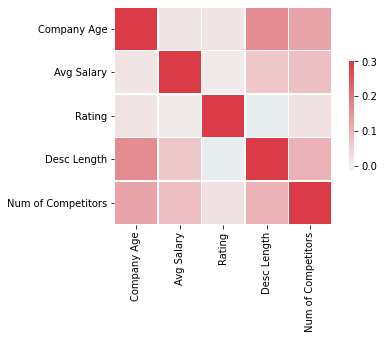

In [23]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['Company Age','Avg Salary','Rating','Desc Length','Num of Competitors']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Plotting Bar for Category field

In [24]:
df_cat = df[['Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'Job State','Same State', 
             'Python', 'SQL', 'Tableu', 'Excel', 'Job Simplifier', 'Seniority']]

graph for Size: total = 9


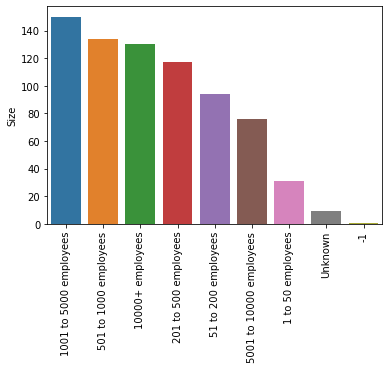

graph for Type of ownership: total = 11


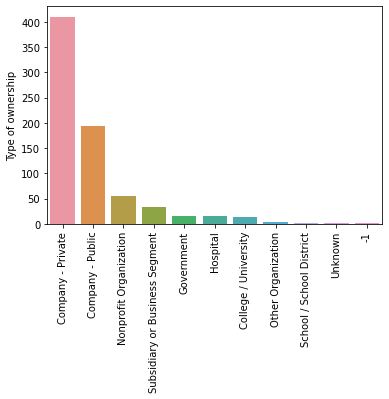

graph for Industry: total = 60


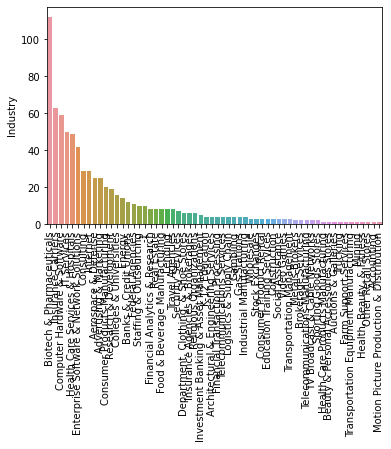

graph for Sector: total = 25


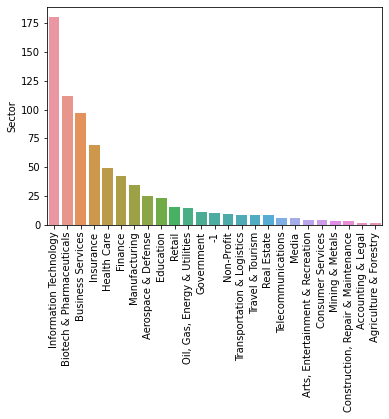

graph for Revenue: total = 14


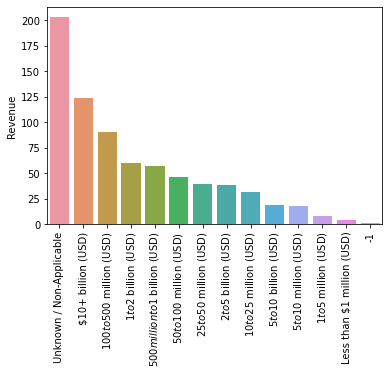

graph for Job State: total = 37


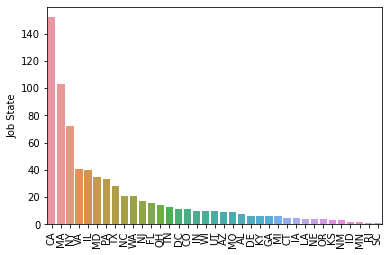

graph for Same State: total = 2


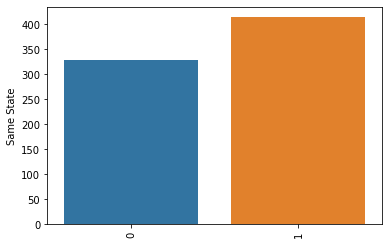

graph for Python: total = 2


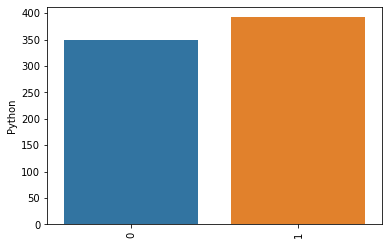

graph for SQL: total = 2


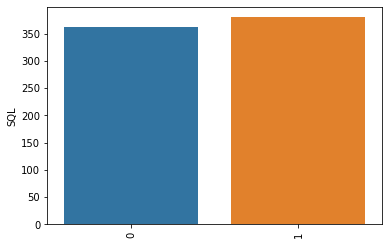

graph for Tableu: total = 1


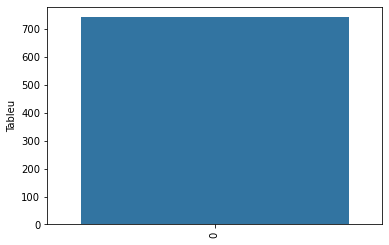

graph for Excel: total = 2


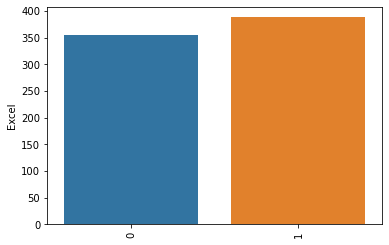

graph for Job Simplifier: total = 7


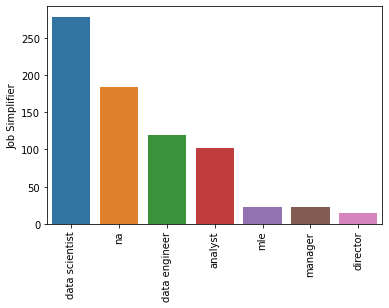

graph for Seniority: total = 3


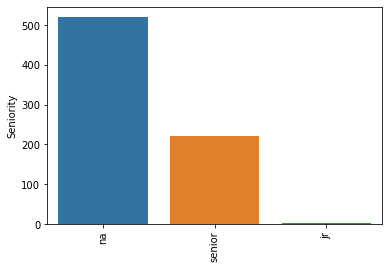

In [25]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [26]:
# Tableu seems irrelevant with our data, so lets get rid of it

df.drop('Tableu', axis = 1, inplace = True)

df_cat = df[['Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'Job State','Same State', 
             'Python', 'SQL', 'Excel', 'Job Simplifier', 'Seniority']]

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'Min Salary', 'Max Salary', 'Avg Salary',
       'Company Txt', 'Job State', 'Same State', 'Company Age', 'Python',
       'SQL', 'Excel', 'Job Simplifier', 'Seniority', 'Desc Length',
       'Num of Competitors'],
      dtype='object')

graph for Location: total = 20


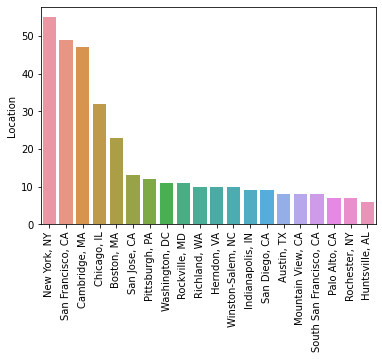

graph for Headquarters: total = 20


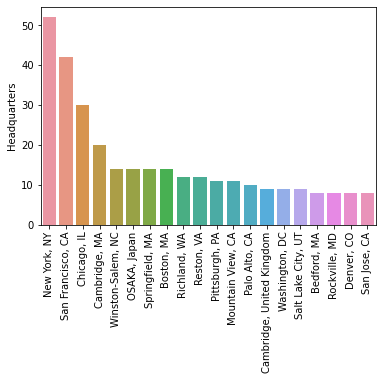

graph for Company Txt: total = 20


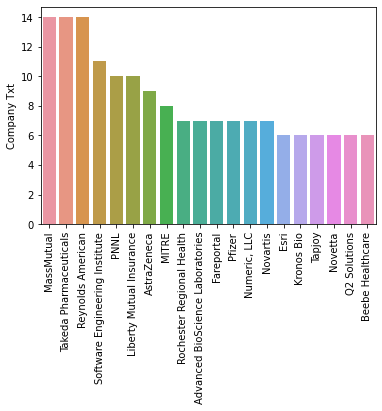

In [28]:
for i in df[['Location', 'Headquarters','Company Txt']].columns:
    cat_num = df[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [29]:
pd.pivot_table(df, index = 'Job Simplifier', values = 'Avg Salary')

,Avg Salary
Job Simplifier,
analyst,66.122549
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,87.967391


In [30]:
pd.pivot_table(df[df['Job Simplifier'] == 'data scientist'], index = 'Job State', 
               values = 'Avg Salary').sort_values('Avg Salary', ascending = False)

,Avg Salary
Job State,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [31]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'Min Salary', 'Max Salary', 'Avg Salary',
       'Company Txt', 'Job State', 'Same State', 'Company Age', 'Python',
       'SQL', 'Excel', 'Job Simplifier', 'Seniority', 'Desc Length',
       'Num of Competitors'],
      dtype='object')

##### Pivot Tables for Rating, Industry, Sector, Revenue, Number of Competitors, Hourly, Employer Provided, Python, SQL, Excel, Desc Length, Type of ownership

In [32]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'Num of Competitors', 'Hourly', 
                'Employer Provided', 'Python', 'SQL', 'Excel', 'Desc Length', 'Type of ownership']]

In [33]:
for i in df_pivots.columns:
    print(pd.pivot_table(df, index = i, values = 'Avg Salary').sort_values('Avg Salary', ascending = False))

        Avg Salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 4.0    107.170213
 3.2    106.928571
 3.7    105.680328
 3.5    104.897959
 4.7    103.983871
 3.3    103.897436
 4.3    102.468750
 4.2    100.442308
 2.2     97.750000
 3.8     97.418033
 4.6     97.250000
 2.1     95.900000
 3.4     93.465909
 3.6     89.945652
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 2.7     85.178571
 2.8     83.928571
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
                                          Avg Salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services               131.500000
Br

In [34]:

pd.pivot_table(df, index = 'Revenue', columns = 'Python', values = 'Avg Salary', aggfunc = 'count')

Python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


##### Using Word Cloud on Job Description

In [35]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk


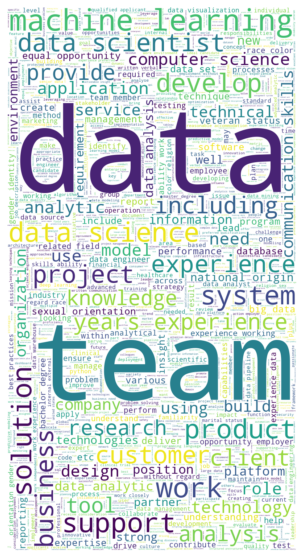

In [41]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [43]:
df.to_csv('EDA_Data.csv', index = False)